In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

## Предобработка таблицы

In [3]:
dasha_df = pd.read_excel('data/Научная работа Ординатор ВМА.xlsx')
dasha_df.drop(labels=['дата операции', '№', 'возраст'], axis=1, inplace=True)
dasha_df.drop(labels=['норадреналин конец операции', 'адреналин конец операции', 'дофамин конец операции ', 'добутамин конец операции'], axis=1, inplace=True)
dasha_df.rename(columns={'Вазоактивный инотропный индекс конец операции': 'Вазоактивный инотропный индекс'}, inplace=True)
dasha_df.head(10)

,ЭКК,Вазоактивный инотропный индекс,Тип операции,Фракция выброса,Тип ИК
0,158,0.0,АКШ,нормальная или промежуточная,параллельное
1,138,5.0,АКШ,нормальная или промежуточная,параллельное
2,108,0.0,АКШ,нормальная или промежуточная,параллельное
3,154,14.0,АКШ,сниженная,полное
4,133,0.0,АКШ,нормальная или промежуточная,параллельное
5,275,20.0,другое,нормальная или промежуточная,полное
6,141,150.0,АКШ,нормальная или промежуточная,параллельное
7,142,2.0,АКШ,нормальная или промежуточная,параллельное
8,203,6.0,АКШ + пластика,нормальная или промежуточная,полное
9,120,5.0,пластика,нормальная или промежуточная,полное


## r коэффициент Пирсона

In [9]:
dasha_df[['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman')

,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.000000,0.286916
Вазоактивный инотропный индекс,0.286916,1.000000


График линейной регрессии для всей выборки

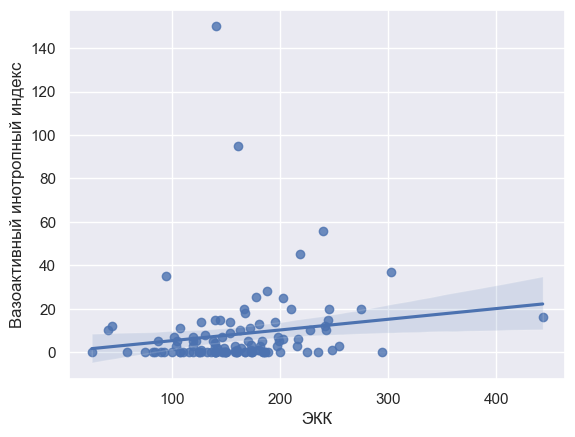

In [5]:
sns.regplot(
    data=dasha_df,
    x='ЭКК',
    y='Вазоактивный инотропный индекс'
);

In [6]:
mask1 = dasha_df['Тип операции'] == 'АКШ'
mask2 = dasha_df['Тип операции'] == 'АКШ + протез '
mask3 = dasha_df['Тип операции'] == 'АКШ + пластика '
mask4 = dasha_df['Тип операции'] == 'протез '
mask5 = dasha_df['Тип операции'] == 'пластика '
mask6 = dasha_df['Тип операции'] == 'другое'


dasha_df[mask5].head()

,ЭКК,Вазоактивный инотропный индекс,Тип операции,Фракция выброса,Тип ИК
9,120,5.0,пластика,нормальная или промежуточная,полное
14,146,7.0,пластика,нормальная или промежуточная,полное
18,173,3.4,пластика,нормальная или промежуточная,полное
19,159,0.0,пластика,нормальная или промежуточная,полное
20,203,25.0,пластика,нормальная или промежуточная,полное


In [7]:
display(dasha_df[mask1][['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman'))
display(dasha_df[mask2][['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman'))
display(dasha_df[mask3][['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman'))
display(dasha_df[mask4][['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman'))
display(dasha_df[mask5][['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman'))
display(dasha_df[mask6][['ЭКК', 'Вазоактивный инотропный индекс']].corr(method='spearman'))

,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.000000,0.214996
Вазоактивный инотропный индекс,0.214996,1.000000


,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.0,1.0
Вазоактивный инотропный индекс,1.0,1.0


,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.000000,0.774806
Вазоактивный инотропный индекс,0.774806,1.000000


,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.000000,0.410391
Вазоактивный инотропный индекс,0.410391,1.000000


,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.000000,0.320985
Вазоактивный инотропный индекс,0.320985,1.000000


,ЭКК,Вазоактивный инотропный индекс
ЭКК,1.000000,0.011239
Вазоактивный инотропный индекс,0.011239,1.000000


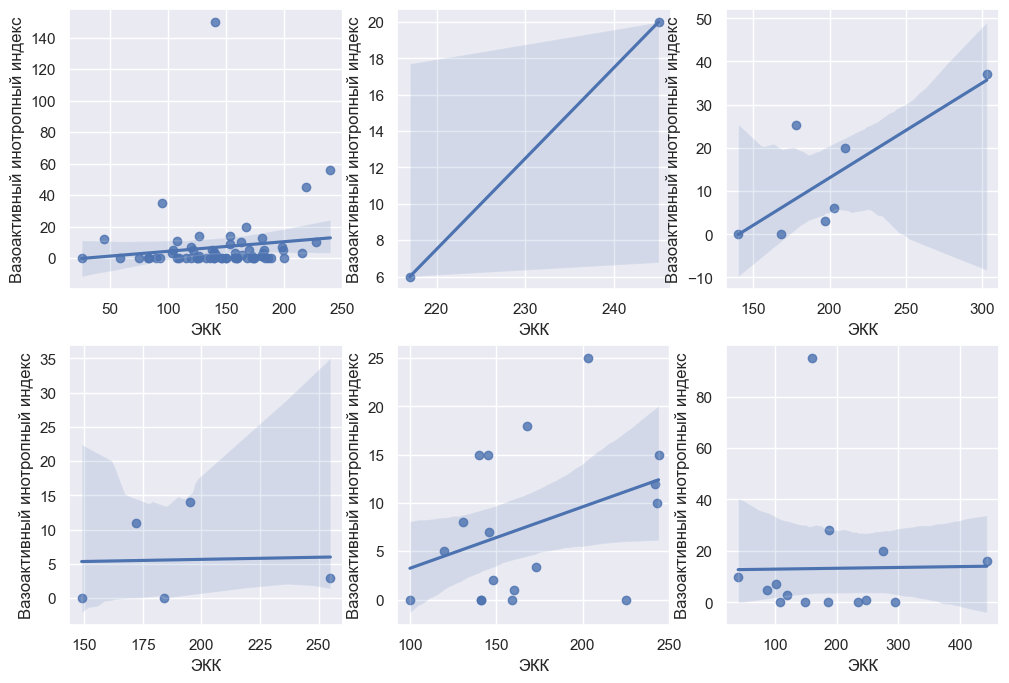

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

sns.regplot(
    data=dasha_df[mask1],
    x='ЭКК',
    y='Вазоактивный инотропный индекс',
    ax=axes[0, 0]
);

sns.regplot(
    data=dasha_df[mask2],
    x='ЭКК',
    y='Вазоактивный инотропный индекс',
    ax=axes[0, 1]
);

sns.regplot(
    data=dasha_df[mask3],
    x='ЭКК',
    y='Вазоактивный инотропный индекс',
    ax=axes[0, 2]
);

sns.regplot(
    data=dasha_df[mask4],
    x='ЭКК',
    y='Вазоактивный инотропный индекс',
    ax=axes[1, 0]
);

sns.regplot(
    data=dasha_df[mask5],
    x='ЭКК',
    y='Вазоактивный инотропный индекс',
    ax=axes[1, 1]
);

sns.regplot(
    data=dasha_df[mask6],
    x='ЭКК',
    y='Вазоактивный инотропный индекс',
    ax=axes[1, 2]
);